In [271]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal as sg
import astropy as astr
import urllib.request
import urllib.parse

**Assignment I**

Question 1:

Since we're trying to recover the coefficients, x and y will essentially be the same thing, but we're going to use y to refer to the variable being integrated over, and x as the one not being integrated over.

$$ h(x) = \sum_{k \ = \ - \infty}^{\infty} \big( \frac{1}{L} \int_{0}^{L} h(y) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ y}dy \big) e^{-2 \ \pi \ i \ \frac{k}{L} \ x}$$

$$ h(x) = \sum_{k \ = \ - \infty}^{\infty} \frac{1}{L} \int_{0}^{L} h(y) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ (y-x)}dy $$

By the hint,

$$ h(x) = \sum_{n \ = \ - \infty}^{\infty} \frac{1}{L} \int_{0}^{L} h(y) \  \delta \big(\frac{i(y-x)}{L} \ - \ n \big) \ dy $$

Moving the sum into the integral, we have

$$ h(x) =  \frac{1}{L} \int_{0}^{L} \sum_{n \ = \ - \infty}^{\infty} h(y) \  \delta \big(\frac{i(y-x)}{L} \ - \ n \big) \ dy $$

Since this delta will remove any values of n and y that do not satisfy the relation for x, we can get rid of the summation and treat h as constant with respect to y, therefore giving us

$$ h(x) =  \frac{1}{L} L \ h(x)$$

$$ h(x) = h(x)$$

Question 2:

I have a sneaking suspicion we can just fourier decompose the following (henceforth called A function)

$$A \ sin \big(\frac{2 \pi x}{L} + \phi \big)$$

to get to the following

$$ B e^{\frac{- 2 \pi i x}{L}} + C e^{\frac{2 \pi i x}{L}}$$

so let's test out my hypothesis, shall we? If we apply equation 2 to our A function, but we split the sum into 3 parts, we get

$$A \ sin \big(\frac{2 \pi x}{L} + \phi \big) = \sum_{k \ = \ - \infty}^{0} \tilde{h}_k \ e^{-2 \ \pi \ i \ \frac{k}{L} \ x} + \sum_{k \ = \ 0}^{\infty} \tilde{h}_k e^{-2 \ \pi \ i \ \frac{k}{L} \ x} - \tilde{h}_{0}$$

with
$$\tilde{h}_k = \frac{1}{L} \int_{0}^{L} A \ sin \big(\frac{2 \pi x}{L} + \phi \big) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx $$

This can be simplified for more intuitive summation bounds by changing the signs of the k in the exponent, which results in the following

$$ A \ sin \big(\frac{2 \pi x}{L} + \phi \big)= \sum_{k \ = \ 0}^{\infty} \tilde{h}_k e^{2 \ \pi \ i \ \frac{k}{L} \ x} + \sum_{k \ = \ 0}^{\infty} \tilde{h}_k e^{-2 \ \pi \ i \ \frac{k}{L} \ x} - \tilde{h}_{0}$$

Heck, we can even put the $\tilde{h}_0$ back into the summations by making one of the integrals start indexing at 1, thereby leaving us with 

$$ A \ sin \big(\frac{2 \pi x}{L} + \phi \big)= \sum_{k \ = \ 0}^{\infty} \tilde{h}_k e^{2 \ \pi \ i \ \frac{k}{L} \ x} + \sum_{k \ = \ 1}^{\infty} \tilde{h}_k e^{-2 \ \pi \ i \ \frac{k}{L} \ x} $$

So we've accomplished our goal, with 

$$ B = \sum_{k \ = \ 1}^{\infty} \tilde{h}_k e^{-2 \ \pi \ i \ \frac{k-1}{L} \ x} $$
$$ C = \sum_{k \ = \ 0}^{\infty} \tilde{h}_k e^{2 \ \pi \ i \ \frac{k-1}{L} \ x} $$

and plugging in $\tilde{h}_k$, we have

$$ B = \sum_{k \ = \ 1}^{\infty} \big( \frac{1}{L} \int_{0}^{L} A \ sin \big(\frac{2 \pi x}{L} + \phi \big) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx \big) e^{-2 \ \pi \ i \ \frac{k-1}{L} \ x} $$
$$ C = \sum_{k \ = \ 0}^{\infty} \big( \frac{1}{L} \int_{0}^{L} A \ sin \big(\frac{2 \pi x}{L} + \phi \big) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx \big) e^{2 \ \pi \ i \ \frac{k-1}{L} \ x} $$

Plugging these into mathematica and simplifying, we get

$$B = \frac{A \ L}{2} \big( i \ Cos(\phi) + Sin(\phi) \big)$$
$$C = 0$$

This seems a little too simple, but for now I'm gonna go with it because I can't find my math error. :)

Question 3:

For real functions, the 

$$ \tilde{h}_k = \frac{1}{L} \int_{0}^{L} h(x) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx $$

Therefore, 

$$ \tilde{h}_{-k} = \frac{1}{L} \int_{0}^{L} h(x) \ e^{2 \ \pi \ i  \ \frac{-k}{L} \ x}dx $$

$$ \tilde{h}^*_k = \frac{1}{L} \int_{0}^{L} h(x) \ e^{2 \ \pi \ (-i)  \ \frac{k}{L} \ x}dx $$

Which one can clearly see becomes

$$ \tilde{h}_{-k} = \frac{1}{L} \int_{0}^{L} h(x) \ e^{-2 \ \pi \ i  \ \frac{k}{L} \ x}dx  = \tilde{h}^*_k$$

Question 4:

$$H(x)= h^{(1)}(x) \ h^{(2)}(x)$$

gives us fourier coefficients of the following form

$$ \tilde{H}_k = \frac{1}{L} \int_{0}^{L} h^{(1)}(x) \ h^{(2)}(x) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx $$

with

$$h^{(1)}(x) = \sum_{k^{(1)} \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k^{(1)}} \ e^{-2 \ \pi \ i \ \frac{k^{(1)}}{L} \ x}$$
$$h^{(2)}(x) = \sum_{k^{(2)} \ = \ - \infty}^{\infty} \tilde{h}^{(2)}_{k^{(2)}} \ e^{-2 \ \pi \ i \ \frac{k^{(2)}}{L} \ x}$$

where 

$$ k^{(1)}+ k^{(2)} = k $$

Calling $k^{(2)}$ $k'$ to better match the syntax of the question, we can rewrite our indices to have

$$ \tilde{H}_k = \frac{1}{L} \int_{0}^{L} \bigg( \sum_{{k'} \ = \ - \infty}^{\infty} \tilde{h}^{(2)}_{k'} \ e^{-2 \ \pi \ i \ \frac{k'}{L} \ x} \bigg) \bigg( \sum_{k-k' \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k-k'} \ e^{-2 \ \pi \ i \ \frac{k-k'}{L} \ x} \bigg) \ e^{2 \ \pi \ i  \ \frac{k}{L} \ x}dx $$


Throwing the outer term into the right hand sum, this becomes:

$$ \tilde{H}_k = \frac{1}{L} \int_{0}^{L} \bigg( \sum_{{k'} \ = \ - \infty}^{\infty} \tilde{h}^{(2)}_{k'} \ e^{-2 \ \pi \ i \ \frac{k'}{L} \ x} \bigg) \bigg( \sum_{k-k' \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k-k'} \ e^{2 \ \pi \ i \ \frac{k'}{L} \ x} \bigg) dx $$

Multiplying the sums gives:

$$ \sum_{{k-k'} \ = \ - \infty}^{k'} \sum_{{k'} \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k-k'} \tilde{h}^{(2)}_{k'} \ e^{-2 \ \pi \ i \ \frac{k'}{L} \ x} e^{2 \ \pi \ i \ \frac{k'}{L} \ x} = \sum_{{k-k'} \ = \ - \infty}^{k'} \sum_{{k'} \ = \ - \infty}^{\infty}\tilde{h}^{(1)}_{k-k'} \tilde{h}^{(2)}_{k'} $$

which renders the first summation unnecessary since k is fixed, so we have 

$$ \tilde{H}_k = \frac{1}{L} \int_{0}^{L} \sum_{{k'} \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k-k'} \tilde{h}^{(2)}_{k'} $$

which is an integral of a constant, so the integral is replaced with an L, which is cancelled by the 1/L which leaves us with:

$$ \tilde{H}_k = \sum_{{k'} \ = \ - \infty}^{\infty} \tilde{h}^{(1)}_{k-k'} \tilde{h}^{(2)}_{k'} $$

as desired.

Investigating the "graphical interpretation" of the product given the situation described in the question led me to make a table of k values and their corresponding $\tilde{h}^{(1)}_{k-k'}$ outputs. In doing so, I observed that the delta function makes all values but $ k' = 10 $ within the sum go to 0, thereby not contributing to the sum. This leaves us with $\tilde{h}^{(1)}_{k-10}$ as the only contribution in the sum, so therefore, $$\tilde{H}_k = \tilde{h}^{(1)}_{k-10}$$. If we were to use the smooth function $$\tilde{h}^{(1)}_{k} = k^2$$
we would see that our corresponding big H simply becomes
$$\tilde{H}_k = (k-10)^2$$
This has literally only shifted the value of $\tilde{h}^{(1)}_{k}$ by 10. The $\tilde{H}_k$ function is plotted below.

In [3]:
k = np.arange(-20.0, 20.0, 1) #making the array of k values
h1 = (k-10)**2 #making the array of h tilde (1) values

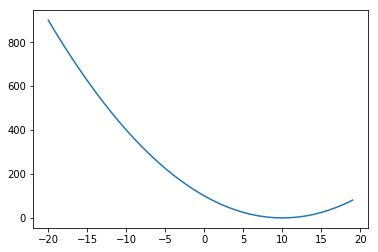

In [5]:
plt.plot(k, h1) 

plt.show()

Question 5:

Doing the transform analytically, we have $$\tilde{h}_{k} = \frac{A \left(2 i \pi  k \cos (\varphi)-i e^{2 i \pi  k} (2 \pi  k \cos (\varphi+1)-i \sin (\varphi+1))+\sin
   (\varphi)\right)}{4 \pi ^2 k^2-1}-\frac{i C \left(-1+e^{2 i \pi  k}\right)}{2 \pi  k}$$
for the cosine and 
$$\tilde{h}_{k} = \sqrt{\frac{\pi}{B} } \frac{A e^{k \pi \left(i-\frac{k \pi }{B L^2}\right)}}{2 L} \left(\text{erf}\left(\frac{B L^2-2 i k \pi }{2 \sqrt{B}
   L}\right)+\text{erf}\left(\frac{B L^2+2 i k \pi }{2 \sqrt{B} L}\right)\right)$$
   
for the gaussian.
   
   
Using $f_k=\frac{1}{L}$, $C = 10$, $A = 12$, $B = 4$, $L = 13$,  and $\varphi = \pi$, we test that the inverse of the fourier transform matches the original function for both functions:

In [50]:
t1 = np.arange(500) #array of time values to feed into the cosine function
orig1 = 10 + 12*np.cos((t1/13)+ np.pi) #cosine function
ft1 = np.fft.fftfreq(t1.shape[-1]) #fft of time array to a frequency array
fourier1 = np.fft.fft(orig1) #fft of amplitude values
inverse1 = np.fft.ifft(fourier1) #inverse fft acting on the fft above to "undo" the fft, leaving us with, hopefully, the original function

C:\Users\MML\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

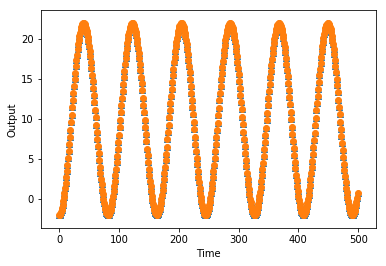

In [51]:
plt.scatter(t1, orig1, marker = '^') #plotting the original cosine function
plt.scatter(t1, inverse1, marker = 'o') #plotting the inverse fft on the fft
plt.xlabel('Time')
plt.ylabel('Output')
plt.show

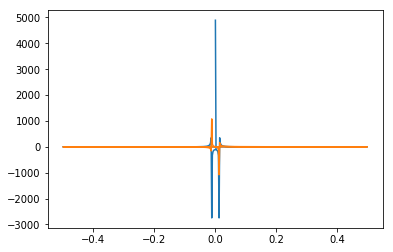

In [52]:
plt.plot(ft1, fourier1.real, ft1, fourier1.imag) #plotting the cosine fft 

In [56]:
t2 = np.arange(0.0,10.0,0.05) #making the time array to feed into the gaussian
orig2 = 12*np.exp(-4*(t2-(13/2))**2) #original gaussian function
ft2 = np.fft.fftfreq(t2.shape[-1]) #fft of the gaussian time array into a freq array
fourier2 = np.fft.fft(orig2) #fft of amplitude values for the gaussian
inverse2 = np.fft.ifft(fourier2) #inverse fft acting on the fft above to, hopefully, recover the original function

C:\Users\MML\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show>

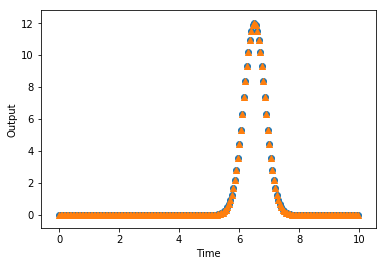

In [57]:
plt.scatter(t2, inverse2, marker = 'o') #plotting the inverse fft acting on the fft of the gaussian
plt.scatter(t2, orig2, marker = '^') #plotting the original gaussian function
plt.xlabel('Time')
plt.ylabel('Output')
plt.show

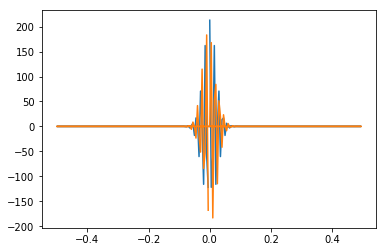

In [58]:
plt.plot(ft2, fourier2.real, ft2, fourier2.imag) #plotting the fft of the gaussian

**Assignment II**

Question 1:

In [71]:
arebo1 = np.loadtxt('arecibo1.txt') #data from arecibo1 (amplitude values)
xarebo1 = np.arange(0,arebo1.size,1) #array of time values

In [72]:
farebo1 = np.fft.fft(arebo1) #fft of arecibo1 amplitude values
fxarebo1 = np.fft.fftfreq(xarebo1.shape[-1]) #fft of the time array to transform to a frequency array

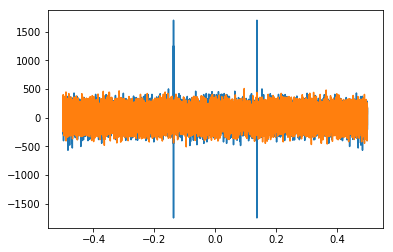

In [73]:
plt.plot(fxarebo1, farebo1.real, fxarebo1, farebo1.imag) #plotting the fft of arecibo1 data

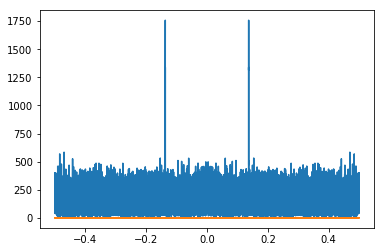

In [84]:
posfarebo1 = np.absolute(farebo1) #absolute value of the fft of arecibo1 data
plt.plot(fxarebo1, posfarebo1.real, fxarebo1, posfarebo1.imag) #plotting the absolute value above

(-0.138, -0.136)

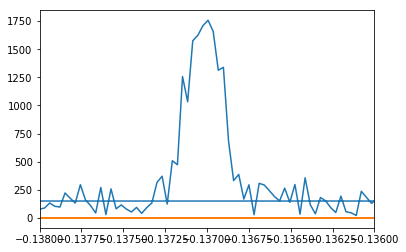

In [90]:
plt.plot(fxarebo1, posfarebo1.real, fxarebo1, posfarebo1.imag) #same plot as above, just zoomed in on the left peak
plt.xlim(-0.138,-0.136)

(0.138, 0.136)

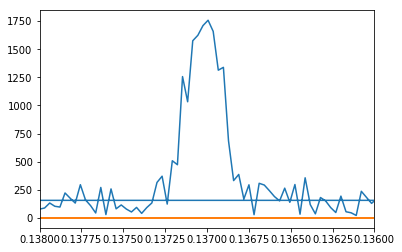

In [91]:
plt.plot(fxarebo1, posfarebo1.real, fxarebo1, posfarebo1.imag) #zoom in on the right hand peak
plt.xlim(0.138,0.136)

In [81]:
index1 = np.argmax(farebo1) #finding the index of the max value in the fft of the arecibo1 data
index11 = np.argmin(farebo1) #finding the index of the minimum value in the fft of the arecibo data

28278


In [83]:
print(farebo1[index1],fxarebo1[index1]) #comparing the magnitudes of the max/min data and printing corresponding freq values
print(farebo1[index11],fxarebo1[index11])

(1702.718988065358+159.64043244519377j) -0.13702392578125
(-1751.7379821917516-147.84135435864502j) 0.136993408203125


Therefore, since our signal frequency is supposed to have the largest magnitude, it corresponds with the second value, 0.13699. Since the original delta x values for the sets were 1 ms, the inverse of that gives kilohertz as the unit for our frequency. Therefore, the value in hertz should be 136.99 Hz.

Question 2:

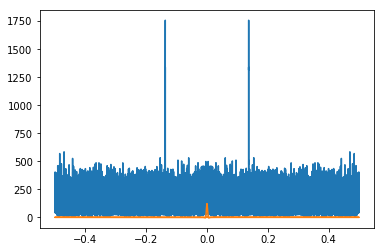

In [112]:
gausenv = np.exp(-((xarebo1-30)/100)**2) #gaussian envelope function
fgausenv = np.fft.fft(gausenv) #fft of the gaussian envelope


plt.plot(fxarebo1, posfarebo1.real, fxarebo1, fgausenv.real) #plotting the fft of the gaussian envelope alongside the abs value of the arecibo1 fft
#plt.xlim(0.138,0.136)

(-0.05, 0.05)

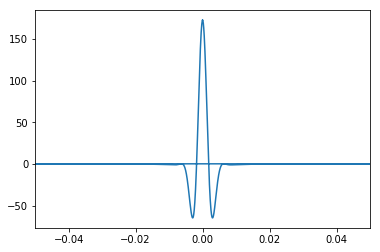

In [118]:
gausenv2 = np.exp(-((xarebo1-136)/100)**2) #another gaussian envelope function for messing with parameters and seeing if the graph reacts as I expect
fgausenv2 = np.fft.fft(gausenv2) #fft of second gaussian envelope
plt.plot(fxarebo1, fgausenv2.real) #plotting fft of second gaussian
plt.xlim(-0.05,0.05)

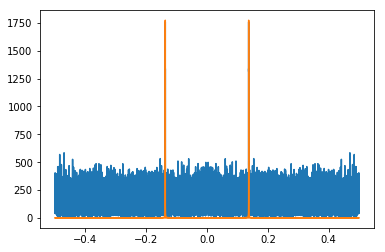

In [241]:
gausenv3 = np.exp(-((xarebo1-0.135)/0.1)**2) #the gaussian function I actually used for this section
sinfunc3 = np.sin((xarebo1)*17.9887) #sine function
fgausenv3 = np.fft.fft(gausenv3) #fft of gaussian
fsinfunc3 = np.fft.fft(sinfunc3) #fft of sine
ftot3 = np.absolute(fgausenv3*fsinfunc3) #convolution
plt.plot(fxarebo1, posfarebo1.real,fxarebo1, ftot3.real) #plotting arecibo1 data alongside the model we're trying to fit
#plt.xlim(-0.05,0.05)

(0.136, 0.138)

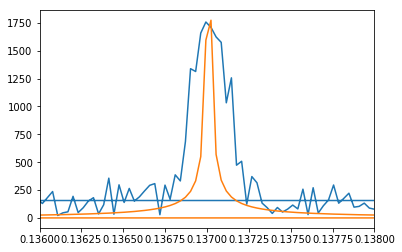

In [242]:
plt.plot(fxarebo1, posfarebo1.real,fxarebo1, ftot3.real) #same plot but zoomed in
plt.xlim(0.136,0.138)

I unfortunately cannot pinpoint how to adjust the width of the gaussian envelope. Logically, I should expect that changing the delta t within the gaussian should change the width of the gaussian, however, instead, I only observe a change in the height of the function, which does not help us get this function to properly match the shaping of the data  :(

**Assignment III**

In [258]:
scargle1 = sg.lombscargle(t2, orig2, np.linspace(0.01,8,1000)) #lomb scargle of gaussian from part 1

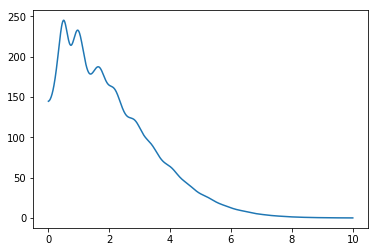

In [259]:
plt.plot(np.linspace(0.01,10,1000), scargle1) #plot of gaussian lomb scargle

In [260]:
scargle2 = sg.lombscargle(xarebo1, arebo1, np.linspace(0.01,10,1000)) #lomb scargle of arecibo1 data

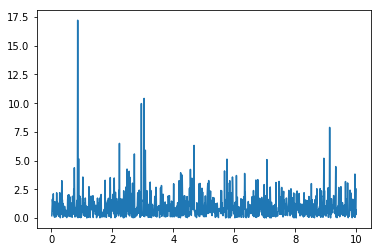

In [261]:
plt.plot(np.linspace(0.01,10,1000), scargle2) #plot of arecibo1 lomb scargle

In [272]:
#The following cells, until marked otherwise, are copied and pasted from my assignment 1

url = 'http://nesssi.cacr.caltech.edu/cgi-bin/getcssconedbid_release2.cgi'
values = {'Name' : 'Her X-1',
          'Rad' : '0.1',
          'DB' : 'Photcat', 
          'OUT' : 'HTML',
          'SHORT' :'short',
          '.submit' : 'Submit'}

data = urllib.parse.urlencode(values)
data = data.encode('ascii') 
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:
   the_page = response.read() 

In [274]:
pagestr = the_page.decode() #change from bytes to string
bigdata = pagestr.split('\n')[104:482] #split the strings along the new lines and only take the data table strings
#print(bigdata)

In [275]:
smalldata=[]
for i, x in enumerate(bigdata):
    smalldata.append(x.split('<td>'))#creating a sublist of values for each time and removing the <td>
#print(smalldata)

In [276]:
#smalldata2 =smalldata[1:len(smalldata)-1]
for i, x in enumerate(smalldata):
    x.remove(x[0]) #gets rid of the '<tr>' element at the beginning of each sublist
    last = x[-1]
    x[-1] = last.strip('</tr>') #gets rid of the </tr> at the end of the last element of each sublist
#print(smalldata)

In [278]:
mag = []
time = []
for i,x in enumerate(smalldata):
    mag.append(float(x[1])) #creating a list of magnitudes
    time.append(float(x[-1])) #creating a list of times
#print(mag)

In [279]:
#this is where the copied cells end

scargle3 = sg.lombscargle(time, mag, np.linspace(0.01,10,1000)) #lomb scargle on the Her-X1 data

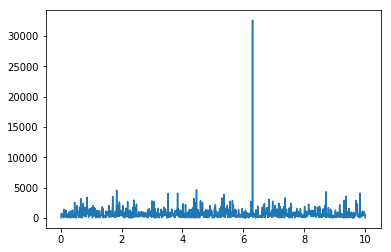

In [280]:
plt.plot(np.linspace(0.01,10,1000), scargle3) #plot of Her-X1 lomb scargle

That looks like our 1.7 day frequency :)
Other likely significant frequencies: 1/(24 hrs), 60 Hz